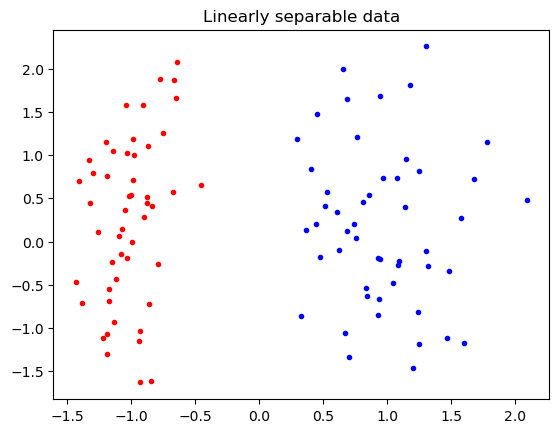

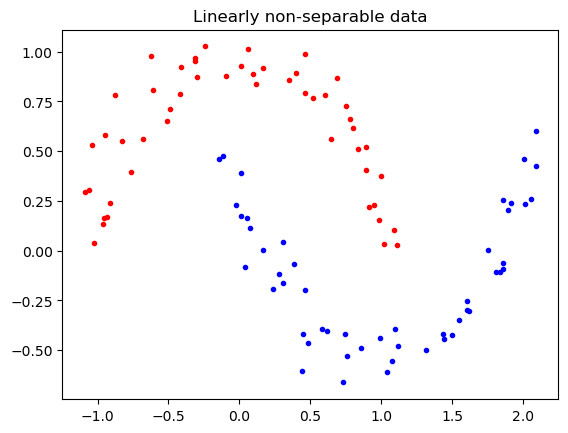

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split

separable = False
state = 2000
# creating linearly separable data
while not separable:
    D1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, 
                                 n_clusters_per_class=1, flip_y=0.01, random_state=state)
    D1[1][D1[1] == 0] = -1
    red = D1[0][D1[1] == -1]
    blue = D1[0][D1[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
    state += 1

# plot the data
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.title('Linearly separable data')
plt.show()


# creating linearly non-separable data
D2 = make_moons(n_samples=100, noise=0.1, random_state=156)

# relabel the classes to -1
D2[1][D2[1] == 0] = -1
red = D2[0][D2[1] == -1]
blue = D2[0][D2[1] == 1]

plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')

plt.title('Linearly non-separable data')
plt.show()


# take 10 samples from each class for testing
D1_x_train, D1_x_test, D1_y_train, D1_y_test = train_test_split(D1[0], D1[1], test_size=0.2, random_state=156)
D2_x_train, D2_x_test, D2_y_train, D2_y_test = train_test_split(D2[0], D2[1], test_size=0.2, random_state=156)


# I'm too lazy to change the variable names
T1_test_X, T1_test_Y = D1_x_test, D1_y_test
T2_test_X, T2_test_Y = D2_x_test, D2_y_test
T1_train_X, T1_train_Y = D1_x_train, D1_y_train
T2_train_X, T2_train_Y = D2_x_train, D2_y_train


# Q5
### Implement the hard-margin SVM and obtain the results for D1. Report also your test set results on T1. 

Accuracy on linearly separable data: 1.0


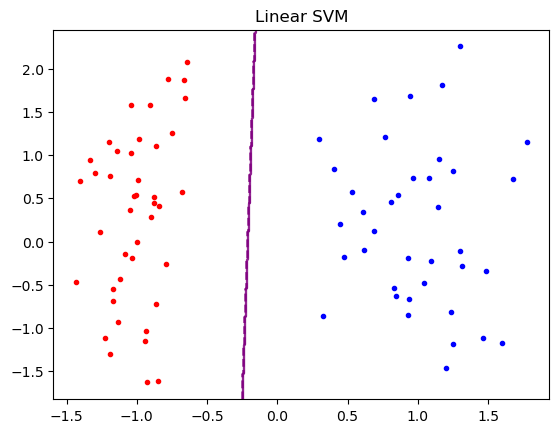

In [95]:

from sklearn.svm import SVC

# hard margin SVM
clf = SVC(kernel='linear', C=10**10)
clf.fit(D1_x_train, D1_y_train)

red = D1_x_train[D1_y_train == -1]
blue = D1_x_train[D1_y_train == 1]

# plot the data
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.title('Linear SVM')

# get the separating hyperplane
ax = plt.gca()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(x_lim[0], x_lim[1], 500)
yy = np.linspace(y_lim[0], y_lim[1], 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.predict(xy).reshape(XX.shape)

# plot decision boundary
ax.contour(XX, YY,Z, alpha=0.4, colors="purple")
plt.plot()

y_pred = clf.predict(D1_x_test)
accuracy = clf.score(D1_x_test, D1_y_test)
print('Accuracy on linearly separable data:', accuracy)

# Q6
### Implement the soft-margin SVM and obtain the results for D1. Report also your test set results on T1. 

Accuracy linearly non-separable data: 0.75


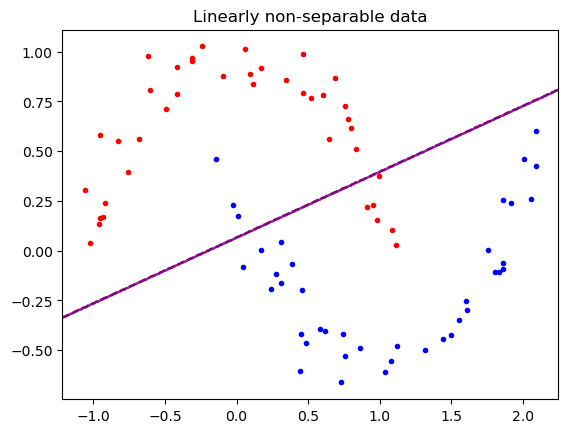

In [94]:
# soft margin SVM
clf = SVC(kernel='linear', C=1)
clf.fit(T2_train_X, T2_train_Y)

red = T2_train_X[T2_train_Y == -1]
blue = T2_train_X[T2_train_Y == 1]

# find the slope and intercept of the decision boundary
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.title('Linearly non-separable data')

# finding the limits of the plot
ax = plt.gca()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(x_lim[0], x_lim[1], 500)
yy = np.linspace(y_lim[0], y_lim[1], 500)
YY, XX = np.meshgrid(yy, xx)

# create the decision boundary
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.predict(xy).reshape(XX.shape)

# plot the decision boundary
ax.contour(XX, YY,Z, alpha=0.4, colors="purple")

plt.plot()

# accuracy of the model
y_pred = clf.predict(T2_test_X)


print('Accuracy linearly non-separable data:', clf.score(T2_test_X, T2_test_Y))

# Q7
### Implement a two-layer multi-layer-perceptron (MLP) structure and use it to classify the data points in D1 and D2. Compare your SVM results and MLP results and comment. 

In [89]:
from sklearn.neural_network import MLPClassifier

# create a neural network with 2 hidden layers of 5 neurons each
model = MLPClassifier(hidden_layer_sizes=(5,5), 
                      activation="relu",
                      max_iter=100000,
                      random_state=12)

# fit the model
model.fit(D1_x_train, D1_y_train)

print("Accuracy: ", model.score(D1_x_test, D1_y_test))

Accuracy:  1.0


In [90]:
# create a neural network with 2 hidden layers of 5 neurons each
model = MLPClassifier(hidden_layer_sizes=(5,5), 
                      activation="relu",
                      max_iter=10000,
                      random_state=12)

# fit the model
model.fit(D2_x_train, D2_y_train)
print("Accuracy: ", model.score(D2_x_test, D2_y_test))


Accuracy:  1.0


SVM and MLP performed perfect score on linearly seperated data. However SVM, was not able to seperate linearly non-seperable data. As a result, MLP was better on classfying nonlinear data with %100 accuracy.(probably my dataset is too easy).


Multilayer perceptrons seems like a better option for linearly non-seperable data.